<a href="https://colab.research.google.com/github/mzhou579/Math-152/blob/Exploration-1/3n%2B1_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration 1: The 3n + 1 conjecture

##By Burleigh Charlton, Ian Wallace,  Perry Winsor, Louis Wooliever, and Chun Zhou

The $3n+1$ conjecture, also known as the Collatz conjecture, is an unproven conjecture in modern mathematics about the sequence:

Start with a postivie integer $n$,

If $n$ is even, divide by $2$,

If $n$ is odd, multiply by $3$ and add $1$,

The conjecture states that all n will eventually stablize to the cycle $4,2,1$. Given that this problem still troubles modern mathematicians, we will set out to check the conjecture up to $n=1,000,000$.

##Cojecture Check (required)

###Brute force approach

Initially, we tried a brute force approach. This method was effective up to about 1,000,000 where the compute time became impractically long.

In summary the brute force approach is to slow, and requires too much processing time to be  practical.

In [ ]:
def seqonce(n):
  '''
  int -> int
  Runs a single iteration of the Collatz sequence.
  '''
  if n % 2 == 0:
    n = n//2
  else:
    n = 3*n+1
  return n

In [ ]:
def seq(n):
  '''
  int -> Boolean
  Runs the Collatz sequence until n is 4. where it produces 4
  '''
  while n != 4:
    n = seqonce(n)
  return True


In [ ]:
def check(n):
  '''
  int -> bool
  Rough, brute-force check.
  Likely to be effective for small numbers but slow at large n.
  '''
  for m in range (1,n+1):
    if seq(m) == True:
      None

  return True

In [ ]:
check(1000)

True

In the same mind, we put together a quick function to provide the full sequence as n approaches 1.

In [ ]:
def seqlist(n):
  '''
  Creates a list of the sequence.
  int(n) -> list(values)
  '''
  initial_value = n 
  values = [] 
  while n not in values:
    values.append(n)
    n = seqonce(n)
  return values

In [ ]:
seqlist(4)

[4, 2, 1]

###Conjecture Check

In order to reduce required processing this new code uses a checklist list. The code starts at a value, then runs the sequence from that value, stopping when it hits a value with **True**. 

Whenever a number is hit, the checklist value for that number is changed to **True**. 

Since $1$  is the only starting value with **True**, any value with **True** therefore stablizes to 1. 

If n returns to the starting value before hitting a different value with **True**, then the sequence stablized outside of $1$, and **False** is returned. 

Else, if the starting value itterates through the entire range, we know the whole checklist is **True** and **True** is returned.

In [ ]:
def conjecture_check(maxvalue):
  '''
  int -> bool
  Checks all numbers up to maxvalue.
  Returns True if all values are checked.
  Returns an False if x stablizes before hitting 1.


  Constructs a list and checks it twice.
  Well it checks it once, but you get the device.
  Fails to find out who is naughty xor nice.
  '''

  checklist = [None]*(maxvalue+1)        
  checklist[1] = True               
                                     
  for start in range(2,maxvalue+1):          
    n = start                           

    while not checklist[n]:          
      checklist[n] = True           
      n = seqonce(n)             

      while n > maxvalue:                
        n = seqonce(n)    

      if n == start:                    
        return False    

  return True

In [ ]:
%timeit conjecture_check(1000000)

1 loop, best of 3: 543 ms per loop


The code was able to check up to the required value of $1,000,000$ in half a second, so I checked a bit higher.

In [ ]:
conjecture_check(10**7)

True

Therefore the conjecture is true up to $10,000,000$.



Should higher ranges need to be checked, we can rule out all even numbers up to $20,000,000$, and then all numbers $0\mod4$ up to $40,000,000$.

Which is to say, expanding the range is rather simple.

In [ ]:
conjecture_check(10**8)

KeyboardInterrupt: ignored

####Debug box

This is just a debug version of the conjecture check function which enunciates a bit more of the inner-workings. It has a few too many print statements to run a couple million times though.

In [ ]:
def checklistdebug(maxvalue):
  '''
  int -> lots of print statements -> list
  Debug version of conjecture_check.
  '''

  checklist = [None]*(maxvalue+1)   #Construct a checklist
  checklist[1] = True
 
  for start in range(2,maxvalue+1):            

    print('Checking starting at {}...{}'.format(start,checklist[start]))
    n = start                  

    while not checklist[n]:         #Runs while n is an unchecked value 
      print('Checking list for {}...{}, changed to True'.format(n,checklist[n]))

      checklist[n] = True           
      n = seqonce(n)                
        
      print('n is now {}'.format(n))
                                    
      while n > maxvalue: #runs while n is outside of our desired range                  
        print('{} is greater than {}...'.format(n,maxvalue))                  
        n = seqonce(n)

      if start == n:
        return start            

    print('->{} is {}'.format(n,checklist[n]))    

  return checklist

In [ ]:
checklistdebug(10)

Checking starting at 2...None
Checking list for 2...None, changed to True
n is now 1
->1 is True
Checking starting at 3...None
Checking list for 3...None, changed to True
n is now 10
Checking list for 10...None, changed to True
n is now 5
Checking list for 5...None, changed to True
n is now 16
16 is greater than 10...
Checking list for 8...None, changed to True
n is now 4
Checking list for 4...None, changed to True
n is now 2
->2 is True
Checking starting at 4...True
->4 is True
Checking starting at 5...True
->5 is True
Checking starting at 6...None
Checking list for 6...None, changed to True
n is now 3
->3 is True
Checking starting at 7...None
Checking list for 7...None, changed to True
n is now 22
22 is greater than 10...
11 is greater than 10...
34 is greater than 10...
17 is greater than 10...
52 is greater than 10...
26 is greater than 10...
13 is greater than 10...
40 is greater than 10...
20 is greater than 10...
->10 is True
Checking starting at 8...True
->8 is True
Checking st

[None, True, True, True, True, True, True, True, True, True, True]

## Graphing

###Code

In [ ]:
def collatz_sequence_tuple(initial_value, iterations):
  '''
  takes a number of iterations 'iterations'
  and an intial value to start at 'initial_value'
  returns a list of tuples of the form (iteration, value)

  computes a the collats sequence via the formula
  3(initial_value)+1
  collatz_sequence: num, num -> list
  '''
  current_value = int(initial_value)
  sequence_list = [(0,initial_value)]
  for i in range(1, iterations):
    if current_value & 1 == 0: #fast way to check if even
      current_value = int(current_value/2)#divide by 2
      sequence_list.append((i, current_value))
    else:
      current_value = int((3 * current_value) + 1) #3n+1
      sequence_list.append((i,current_value))
  return sequence_list



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_collatz(max_val, iterations, marker='+', linestyle='dashed', linewidth=0):
  '''
  plots the collatz sequence of starting values
  1 through 'max_val', or 'iterations' iterations

  plot_collatz: num, num, marker, linestyle, linewidth -> graph(image)
  '''
  fig, ax = plt.subplots(1,1) # gets a handle for the AxesSubplot object
  #ax=fig.add_subplot(111)
  color=iter(cm.rainbow(np.linspace(0,1,max_val)))
  for i in range(1, max_val):
    c=next(color)
    data_in_array = np.array(collatz_sequence_tuple(i, iterations)).T #put the list into an array and transpose it
    x,y = data_in_array #make it x and y
    #fig, ax = plt.subplots(1,1) # gets a handle for the AxesSubplot object
    #ax.plot(x, y, 'ro')
    ax.plot(x, y, c=c, marker=marker, linestyle=linestyle, linewidth=linewidth, markersize=4)
  plt.title('Collatz Sequence 0 to {}'.format(max_val))
  plt.xlabel('Iteration')
  plt.ylabel('Value')
  #ax.xaxis.set_major_locator(MultipleLocator(iterations/10))
  ax.set_xlim(0,iterations )
  plt.show()



###Plotting

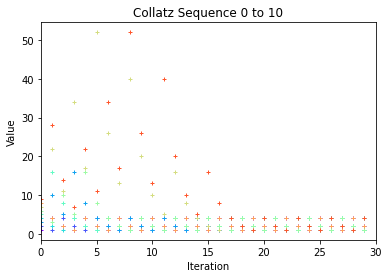

In [ ]:
plot_collatz(10,30)

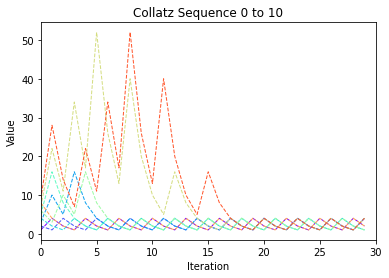

In [ ]:
plot_collatz(10,30, marker='', linewidth=1)

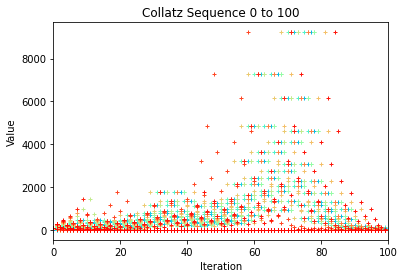

In [ ]:
plot_collatz(100,100)

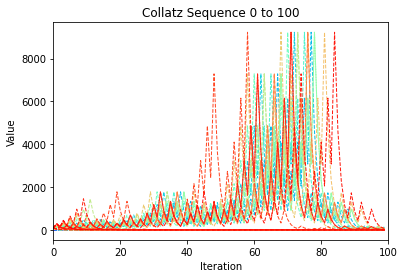

In [ ]:
plot_collatz(100,100, marker='', linewidth=1)

##Negative Checking

After allowing the negative numbers, the original conjectures does not work on the negative integers. The negative numbers do not converge into the 1 and repeat from that because they can not change from negative to positive. Thus, I create the function that will check if the negative numbers also loop at the certain numbers to see if they have some pattern.

The function below is the funtion that will run the conjecture for the input "n" and print out all the process of the conjecture and stop if the conjecture starts to repeat and return the number of iterations that it takes to repeat.

In [ ]:
# Optional part Check the conjecture for negative number.

def conj_neg(n):
  '''
  Run the 3n+1 conjecture with input n. It prints out every steps until
  the n become 1, which will loop after.
  '''
  if type(n) != int: #check if the input is integer
    raise TypeError('Only integers can be even or odd.')
  #if n<0: #check if the input is positive
    #raise ValueError('Cannot be negative numbers.')
  L =[0]
  for s in range(-n):
    if n%2 == 0: # when n is even, divide by 2
      n = n/2
    else: # when n is odd, n = 3n+1
      n = 3*n+1
    for i in range(len(L)): # check if the number is at 1, it will loop from there
      if n == L[i]:
        print(n)
        print('iteration: ', len(L))
        return True
    print(n)  #print out every step
    L.append(n)
  return True

In [ ]:
conj_neg(-100)

-50.0
-25.0
-74.0
-37.0
-110.0
-55.0
-164.0
-82.0
-41.0
-122.0
-61.0
-182.0
-91.0
-272.0
-136.0
-68.0
-34.0
-17.0
-50.0
iteration:  19


True

In [ ]:
conj_neg(-20)

In [ ]:
conj_neg(-50)

In [ ]:
conj_neg(-40)

In [ ]:
conj_neg(-150)

In [ ]:
conj_neg(-2000)

In [ ]:
conj_neg(-10101300)

In [ ]:
conj_neg(-100000)

In [ ]:
conj_neg(-22334000)

In [ ]:
conj_neg(-2013120)

After runing many examples through the function, it is obvious that negative integers would also loop on the conjectures at the certain numbers. However, the negative integers do not all converge to the -1 and repeat from their which similar as the positive integer. Instead, only the negative integers that become one of the negative of power of 2 (e.g. $-(2^x)$) within the conjecture would eventually drop to -1.

The reason for the difference results between the negative and positive integers is that even the multiple and division works similar for negative and positive integers, the addition and subtraction work differently for negative and positive integers. Thus, it create the results that for even negative numbers, "`n/2`" works same as the positive numbers, but for the odd negative numbers, "`3n+1`" would result in "`-3n+1 = -|3n-1|`", which would be different with the positive.

However, even the negative integers works different from positive integers, they also will repeat at some negative integers. Generally, the larger the negative integer it is, more iteration it may require to reach that repeat point. There is not specific integer for every negative integer to loop.

##Dropping Times

###Testing

In [ ]:
def conj_drop(n):
  '''
  Performs the function as usual, but terminates once the sequence goes below the input

  conj_drop: num(n) -> int
  '''
  orig = n
  steps = 0
  while n >= orig:
    if n%2 == 0:
      n = n//2
    else:
      n = 3*n + 1
    steps += 1
  return steps

def list_conj_drop(n,array,total):
  '''
  Run the 3n+1 conjecture with input n. It prints out every steps until
  the n become 1, which will loop after.
  'n'     the number to check
  'array' as a initially populated with all 0 of length 'total'
  'total' the highest number we are checking to


  conj: num, array, num -> boolean
  '''
  if type(n) != int: #check if the input is integer
    raise TypeError('Only integers can be even or odd.')
  
  original = n
  t = n
  while (n != 1 and array[t] != 1 and original <= n): # check if the number is at 1, it will loop from there 
    if n%2 == 0: # when n is even, divide by 2
      n = (int)(n/2)
    else: # when n is odd, n = 3n+1
      n = (int)(3*n+1)
    if n <= total:
      t = n
    else:
      t = 0
    
    #print('n is: ',n, 'array[{}]{}'.format(t,array[t]))  #print out every step
    #print(array)
    
  
  return True

In [ ]:
%timeit conj_drop(19083275)

The slowest run took 5.09 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.13 µs per loop


In [ ]:
%timeit list_conj_drop(19083275,[0]*19083276,19083275)

10 loops, best of 3: 126 ms per loop


In [ ]:
%timeit conj_drop(1289346197)

The slowest run took 9.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 664 ns per loop


In [ ]:
%timeit list_conj_drop(1289346197,[0]*1289346198,1289346197)

1 loop, best of 3: 6.45 s per loop


`list_conj_drop` is based off a function used to study the complete sequences of various inputs, but for whatever reason, it seems like brute force is working faster for finding the drop times.

####Discussion

Here's some quick code to test dropping times:

```
dropping(n)
```
which runs the sequence while counting the itterations until n is below the initial value.


In [ ]:
dropping(n=17)

3

In [ ]:
seqlist(n=17)

[17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

Not much can be learned from looking simply at individual dropping times. In fact, they seem to be completely random. I compiled a list of droptimes using

```
createdroplist(n)
```
which makes makes a quick list of dropping times for values up to n.


In [ ]:
maxvalue = 2**(20+2)
droplist = createdroplist(maxvalue)
droplist[17]

3

Looking at the first 100 values:

In [ ]:
droplist[1:101]

['Undefinded',
 1,
 6,
 1,
 3,
 1,
 11,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 11,
 1,
 3,
 1,
 6,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 96,
 1,
 3,
 1,
 91,
 1,
 3,
 1,
 6,
 1,
 3,
 1,
 13,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 88,
 1,
 3,
 1,
 6,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 11,
 1,
 3,
 1,
 88,
 1,
 3,
 1,
 6,
 1,
 3,
 1,
 83,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 13,
 1,
 3,
 1,
 6,
 1,
 3,
 1,
 8,
 1,
 3,
 1,
 73,
 1,
 3,
 1,
 13,
 1,
 3,
 1,
 6,
 1]

An obvious pattern arrises as all even numbers have a dropping time of $1$. In this case we did speed up the code by writting this in initially, but proof should be unnecessary. 

Interestingly though, all numbers $1\mod4$ seem to drop in 3. So I explored this idea a bit further.

####Code

In [ ]:
def dropping(n):
  '''
  input(int) -> int
  Code that returns the dropping value of n.
  '''
  if n % 2 == 0:
    return 1
  elif n <= 1:
    return False
  else:
    init_val = n
    itteration = 0
    while n >= init_val:
      itteration += 1
      n = seqonce(n)
  return itteration 

In [ ]:
def createdroplist(maxvalue):
  '''
  int -> list
  Creates a list of all dropping times for values up to n.
  '''
  droplist = [None]*(maxvalue+1)
  droplist[1] = 'Undefinded'
  droplist[2: :2]=[1]*(maxvalue//2)
  for x in range(3,maxvalue+1,2):
    droplist[x]=dropping(x)
  return droplist

###Exploring Dropping Times $\text{mod } 2^n$

In [ ]:
def conj_drop_mod4(n):
  mod4list = []
  for i in range(3,n+1,2):
    if conj_drop(i) % 4 == 0:
      mod4list.append(i)
  return mod4list


def conj_drop_mod8(n):
  mod8list = []
  for i in range(3,n+1,2):
    if conj_drop(i) % 8 == 0:
      mod8list.append(i)
  return mod8list


def conj_drop_mod16(n):
  mod16list = []
  for i in range(3,n+1,2):
    if conj_drop(i) % 16 == 0:
      mod16list.append(i)
  return mod16list


def conj_drop_mod32(n):
  mod32list = []
  for i in range(3,n+1,2):
    if conj_drop(i) % 32 == 0:
      mod32list.append(i)
  return mod32list


def conj_drop_mod64(n):
  mod64list = []
  for i in range(3,n+1,2):
    if conj_drop(i) % 64 == 0:
      mod64list.append(i)
  return mod64list

In [ ]:
conj_drop_mod64(1000000)

[336199, 366447, 611455, 695067, 909311]

In [ ]:
%timeit conj_drop_mod64(1000000)

1 loop, best of 3: 692 ms per loop


In [ ]:
conj_drop_mod32(10000)

[27,
 239,
 487,
 763,
 1127,
 1255,
 1439,
 1511,
 2139,
 2175,
 2255,
 2511,
 2879,
 3199,
 3279,
 3871,
 4167,
 4351,
 4511,
 5211,
 5223,
 5247,
 5679,
 6235,
 7271,
 7583,
 7615,
 7707,
 7999,
 8039,
 8283,
 8319,
 8607,
 8751,
 9023,
 9063,
 9343,
 9447,
 9703]

####Discussion

In order to explore more modulo powers of $2$, I wrote a code to sort values for me:

```
sortdroplistmodpow2(n,droplist)
```

takes my droplist and sorts it for powers of $2$ up to $2^n$. It catalogues the values in a dictionary by their modulo, as a list of lists. 

For example ```droplistmod[4]``` is a list of length $4$, where the index of the list corresponds to a modulo of $4$, and each value in the inner list is a dropping time.


In [ ]:
droplistmod=sortdroplistmodpow2(20,droplist)

In [ ]:
droplistmod[4][1][1:101]

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [ ]:
droplistmod[4][3][1:101]

[11,
 8,
 11,
 6,
 8,
 96,
 91,
 6,
 13,
 8,
 88,
 6,
 8,
 11,
 88,
 6,
 83,
 8,
 13,
 6,
 8,
 73,
 13,
 6,
 68,
 8,
 50,
 6,
 8,
 13,
 24,
 6,
 11,
 8,
 11,
 6,
 8,
 65,
 34,
 6,
 47,
 8,
 13,
 6,
 8,
 11,
 21,
 6,
 13,
 8,
 21,
 6,
 8,
 13,
 50,
 6,
 19,
 8,
 32,
 6,
 8,
 44,
 21,
 6,
 11,
 8,
 11,
 6,
 8,
 39,
 16,
 6,
 13,
 8,
 21,
 6,
 8,
 11,
 34,
 6,
 34,
 8,
 13,
 6,
 8,
 16,
 13,
 6,
 26,
 8,
 16,
 6,
 8,
 13,
 19,
 6,
 11,
 8,
 11,
 6]

While $100$ $3$'s doesn't prove anything, it reinforces my hypothesis. There seems to be a pattern arrising from modulo of powers of 2.

Since $(0\mod4)+(2\mod4)=0\mod2$, by this hypothesis, we have effectively calculated the dropping time for $75\%$ of all numbers.

But we can take it further.

I wrote a code to further investigate this pattern by listing off all consistancies in modulo powers of $2$.

```
droppingmodpow2(n,droplistmod)
```

takes my droplistmod dictionary from ```sortdroplistmodpow2(n,droplist)``` and creates a pattern dictionary for all consistancies under modulo power of $2$ up to $2^n$.

In order to do this it references the stored lists in the droplistmod dictionary and checks if they are consistant throughout. It then updates a pattern dictionary to track any already observed patterns. In later powers of 2, it ignores patterns that were already observed.

The values are stored as a tuple ```(droptime,values)``` where droptime is the drop time and values is a list of the values modulo 2 that drop in such a drop time.

All conclusions are drawn from lists of length $8$ or longer. I do assume 
Initially I included a print statement, but I removed it for the larger patterndict.

In [ ]:
patterndict=droppingmodpow2(10,droplistmod)

0 mod 2 always drops in 1
1 mod 4 always drops in 3
3 mod 16 always drops in 6
11 mod 32 always drops in 8
23 mod 32 always drops in 8
7 mod 128 always drops in 11
15 mod 128 always drops in 11
59 mod 128 always drops in 11
39 mod 256 always drops in 13
79 mod 256 always drops in 13
95 mod 256 always drops in 13
123 mod 256 always drops in 13
175 mod 256 always drops in 13
199 mod 256 always drops in 13
219 mod 256 always drops in 13


An even more interesting pattern seems to arrise looking at the early print statments, while not every power of $2$ has a value attatched to it, all values for the same modulo have the same dropping time.

Given the initial tendency towards a pattern, I modified my code to store the values under a set dropping time. These print statments, are calculated without that assumption, so while not shown, I manually checked through the higher included values before I assumed this.

In [ ]:
patterndict=droppingmodpow2(20,droplistmod)

In [ ]:
for pow2 in range(1,11):
  print('There are {} values mod 2^{}, they drop in {}'.format(len(patterndict[2**pow2][1]),pow2,patterndict[2**pow2][0]))

There are 1 values mod 2^1, they drop in 1
There are 1 values mod 2^2, they drop in 3
There are 0 values mod 2^3, they drop in None
There are 1 values mod 2^4, they drop in 6
There are 2 values mod 2^5, they drop in 8
There are 0 values mod 2^6, they drop in None
There are 3 values mod 2^7, they drop in 11
There are 7 values mod 2^8, they drop in 13
There are 0 values mod 2^9, they drop in None
There are 12 values mod 2^10, they drop in 16


While every $3$ powers of $2$ seem to not have any values, the number of values is increasing steadily.

In [ ]:
for pow2 in range(11,21):
  print('There are {} values mod 2^{}, they drop in {}'.format(len(patterndict[2**pow2][1]),pow2,patterndict[2**pow2][0]))

There are 0 values mod 2^11, they drop in None
There are 30 values mod 2^12, they drop in 19
There are 85 values mod 2^13, they drop in 21
There are 0 values mod 2^14, they drop in None
There are 173 values mod 2^15, they drop in 24
There are 476 values mod 2^16, they drop in 26
There are 0 values mod 2^17, they drop in None
There are 961 values mod 2^18, they drop in 29
There are 0 values mod 2^19, they drop in None
There are 2652 values mod 2^20, they drop in 32


The every 3 pattern falls off immediatly outside of my initail range, but the values continue to increase.

To close things off, I wrote a quick code to caclulate the percentage of numbers that we have a set dropping value for:

In [ ]:
num,den=0,1
for pow2 in range(1,21):
  num *= 2
  den *= 2
  num += len(patterndict[2**pow2][1])
  print('Accounting for cancelation modulo {}, we can account for {}% of all numbers'.format(2**pow2,num/den))

Accounting for cancelation modulo 2, we can account for 0.5% of all numbers
Accounting for cancelation modulo 4, we can account for 0.75% of all numbers
Accounting for cancelation modulo 8, we can account for 0.75% of all numbers
Accounting for cancelation modulo 16, we can account for 0.8125% of all numbers
Accounting for cancelation modulo 32, we can account for 0.875% of all numbers
Accounting for cancelation modulo 64, we can account for 0.875% of all numbers
Accounting for cancelation modulo 128, we can account for 0.8984375% of all numbers
Accounting for cancelation modulo 256, we can account for 0.92578125% of all numbers
Accounting for cancelation modulo 512, we can account for 0.92578125% of all numbers
Accounting for cancelation modulo 1024, we can account for 0.9375% of all numbers
Accounting for cancelation modulo 2048, we can account for 0.9375% of all numbers
Accounting for cancelation modulo 4096, we can account for 0.94482421875% of all numbers
Accounting for cancelatio

While there is seemingly no pattern in the dropping time number or in the number of values added, aside from increase, the percentage of values covered continues to go up. While this is far from a formal proof, one could stipulate that all dropping time values fall into a patterns modulo powers of 2 in such a manner.

####Code

In [ ]:
def sortdroplistmodpow2(n,droplist = None):
  '''
  int, list -> dict{int:list}
  Creates a dictionary storing powers of 2 up to 2^n as a keys.
  Values are assigned as a list of lists or dropping values, sorted by their modulo for that power of 2.
  The max allowed power of 2 is 20.
  '''
  if n > 20:
    raise ValueError('Please input a value less than 21.')
  if not droplist:
    droplist = createdroplist(2**(n+2))
  droplistmod = {}
  for x in range(1,n+1):
    templist = [None]*(2**x)
    for y in range(2**x):
      templist[y] = droplist[y: :(2**x)]

    droplistmod.update({2**x:templist})
  return droplistmod

In [ ]:
def checkmoddict(n,moddict):
  '''
  dict{int:list} -> bool
  Checks if n is a stored modulo value in the dictionary. 
  '''
  for mod in moddict:
    for value in moddict[mod][1]:
      if n%mod == value:
        return False
  return True

In [ ]:
def droppingmodpow2(n,droplistmod = None):
  '''
  int, dict -> print statements -> dict{int:(int,list)}
  Using print commands, lists all dropping values that stablize modulo powers of 2.
  Exculdes 0 and 1 as outliers.
  Returns a dictionary with powers of 2 as the keys,
  and their assigned value a touple (dropping time, values mod (key) that drop in dropping time).
  This assumes that all values added at (pow2) have the same droptime.
  '''
  if not droplistmod:
    droplistmod = sortdroplistmodpow2(n)
  patterndict = {2:(1,[0]),4:(3,[1])}
  #print('{} mod {} always drops in {}'.format(0,2,1))
  #print('{} mod {} always drops in {}'.format(1,4,3))
  for pow2 in range(1,n+1):
    for value in range(2**pow2):
      droptime = droplistmod[2**pow2][value][1]
      checklist = [True for k in droplistmod[2**pow2][value] if k == droptime]
      if len(checklist) == len(droplistmod[2**pow2][value]) and checkmoddict(value,patterndict):
        #print('{} mod {} always drops in {}'.format(value,2**pow2,droptime))
        if 2**pow2 not in patterndict:
          patterndict.update({2**pow2:(droptime,[value])})
        else:
          patterndict[2**pow2][1].append(value)
  for pow2 in range(1,n+1):
    if 2**pow2 not in patterndict:
      patterndict.update({2**pow2:(None,[])})
  return patterndict

##Changing the Rules of the Conjecture

The collatz Conjecture is interesting to study because of how nicely the results seem to come out. The conjecture itself is the statement that all positive integers will eventually fall to 1. But if the rules of the sequence are changed, will the results be as nice?

I believe the obvious answer is no.

###Discussion

I looked at two new rulesets, $5x+3$, divide$\mod 2$, and $5x+2$, divide$\mod 3$.

While the results didn't seem to arrise any pattern, and many numbers simply exploded off to infinity, the fact that it forms distinct branches may be of some interst.

For example, with the general rule of the conjecture, $3x + 1$, divide$\mod 2$. We would consider every value to branch from one, which is to say, every value eventually leads down the tree to one. 

To explore these concepts, I created a customizable code customseq which takes n and runs an itteration of a custom sequence. 

```
customseq(x,up,down)
```

The default sequence values being the general rules of the conjecture.

$3(1)+1=4$

In [ ]:
customseq(x=1)

4

$5(5)+3 = 28$

In [ ]:
customseq(x=5,up=(5,3))

28

$5(8)+2=42$

In [ ]:
customseq(x=8,up=(5,2),down=3)

42

$42\mod3=0$, so $42\div3=14$

In [ ]:
customseq(x=42,up=(5,2),down=3)

14

I could run single itterations all day and never reach any conclusions about branches or patterns, so I made a code to produce the sequence for me until it "explodes" or "stablizes".

```
customseqlist(start,up,down,maxlength,maxvalue)
```



In [ ]:
customseqlist(start=1)

(True, [1, 4, 2])

That much is fairly obvious from our previous observations in this notebook, so I'll explore a bit more.

In [ ]:
customseqlist(start=5,up=(5,3),down=2,maxlength=10)

(None, [5, 28, 14, 7, 38, 19, 98, 49, 248, 124])

From a glance, the sequence seems to be increasing, so let's let it run a bit longer.


In [ ]:
customseqlist(start=124,up=(5,3),down=2,maxlength=True,maxvalue=10000)

(False,
 [124,
  62,
  31,
  158,
  79,
  398,
  199,
  998,
  499,
  2498,
  1249,
  6248,
  3124,
  1562,
  781,
  3908,
  1954,
  977,
  4888,
  2444,
  1222,
  611,
  3058,
  1529,
  7648,
  3824,
  1912,
  956,
  478,
  239,
  1198,
  599,
  2998,
  1499,
  7498,
  3749,
  18748,
  9374,
  4687,
  23438,
  11719,
  58598,
  29299,
  146498,
  73249,
  366248,
  183124,
  91562,
  45781,
  228908,
  114454,
  57227,
  286138,
  143069,
  715348,
  357674,
  178837,
  894188,
  447094,
  223547,
  1117738,
  558869,
  2794348,
  1397174,
  698587,
  3492938,
  1746469,
  8732348,
  4366174,
  2183087,
  10915438,
  5457719,
  27288598,
  13644299,
  68221498,
  34110749])

Since the output box got a bit long, I put it in a text box. That, however, doesn't change the fact that the seqeunce seems to be unbounded, so we'll consider these values as "exploded".

In [ ]:
customseqlist(start=8,up=(5,2),down=3)

(True, [8, 42, 14, 72, 24])

Interestingly enough, $8$ stablizes for the other ruleset. So we'll consider $8$ as "stablized", since it is the lowest value in the loop.

Thus far we have discovered that changing the rules of the conjecture leads to some interesting results. 

Loops still form, but now we have values that seemingly explode to infinity. Once again, I could continue to explore these ideas at this pace, or I can write more code to do it for us. I chose the latter.

```
customcheck(maxvalue,up,down)
```
customcheck runs for all numbers up to a max value for our custom ruleset, and returns our stablized and exploded values as two lists. It evaluates in a similar manner to my conjecture_check code, using a checklist, but now stores a bit more data while it runs.


Once again, for our baseline:

In [ ]:
customcheck(value=10000)

([1], [])

This tells us $1$ is the lowest number in any loop formed, and there are no values that "exploded." But we knew that; I wrote a far more efficient code to tell us that earlier. So let's explore a little. 

In [ ]:
customcheck(maxvalue=10000,up=(5,3))[0]

[1, 3, 39, 43, 51, 53, 61]

It appears that there are stablized values for our $5x+3$ ruleset. And, interestingly enough, seven of them.

In [ ]:
len(customcheck(maxvalue=10000,up=(5,3))[1])

9359

That said, it seems that $93\%$  of values up to $10,000$ explode. Which is a rather large portion. 

Going back to our $5x+2,\mod3$ ruleset.

In [ ]:
customcheck(maxvalue=10000,up=(5,2),down=3)[0]

[8]

It seems $8$ is our only stablized value.

In [ ]:
len(customcheck(maxvalue=10000,up=(5,2),down=3)[1])

9981

And this leads to even more exploded values. Only $19$ values less than $10,000$ stablize to 8.

These observations make the consistancy of the ruleset $3x+1,\mod2$ seem rather mystical, since changing the rules causes so many values to explode.

For the sake of enumeration, I included a function:

```
getloops(maxvalue,up,down,stablized_values)
```
which runs customcheck, then customseqlist to list the loops formed under the given ruleset.


In [ ]:
getloops(maxvalue=10000)

{1: [1, 4, 2]}

In [ ]:
getloops(maxvalue=10000,up=(5,3))

{1: [1, 8, 4, 2],
 3: [3, 18, 9, 48, 24, 12, 6],
 39: [39, 198, 99, 498, 249, 1248, 624, 312, 156, 78],
 43: [43, 218, 109, 548, 274, 137, 688, 344, 172, 86],
 51: [51, 258, 129, 648, 324, 162, 81, 408, 204, 102],
 53: [53, 268, 134, 67, 338, 169, 848, 424, 212, 106],
 61: [61, 308, 154, 77, 388, 194, 97, 488, 244, 122]}

In [ ]:
getloops(maxvalue=10000,up=(5,2),down=3)

{8: [8, 42, 14, 72, 24]}

And finally, I wrote a code to sort all non-exploded numbers in our range by the value they stablize too:

```
getbranches(maxvalue,up,down,stablized_values,exploded_values)
```



In [ ]:
getbranches(maxvalue=1248,up=(5,3))[39]

[15,
 30,
 60,
 78,
 99,
 120,
 156,
 198,
 240,
 249,
 312,
 396,
 480,
 498,
 543,
 555,
 624,
 633,
 792,
 960,
 996,
 1086,
 1110,
 1248]

Interestingly enough, $15$ and $30$ both stablize to $39$, which is a larger number. This exception was a lucky discovery, though I did have to spend a couple hours bug fixing to allow such exceptions. 

The assumption that all values stablize to a lower value was based off the original conjecture, but changing the rules allowed for more intersting patterns to arise.

The obvious reason is that $78$ is $3\mod5$ and $0\mod2$, but that as nothing to do with $39$ being a stablized value. There may be a way to predict the creation of such occurances, but I digress.

In [ ]:
getbranches(maxvalue=10000,up=(5,2),down=3)

{8: [14,
  24,
  42,
  72,
  126,
  216,
  378,
  648,
  680,
  1134,
  1166,
  1944,
  2040,
  3402,
  3498,
  5832,
  6120,
  6296]}

The branch for our $5x+2,\mod3$ rule is very short, as we discovered earlier. Though it is nice to see it spelled out rather than as a statistic.




Now, I want to quickly run through a few other rulesets that might be interesting.

To return to the negative numbers, in my own way: 

The ruleset $3x-1,\mod2$ over positive values is the same as running $3x+1,\mod2$ over negative values, in terms of absolue value. 

In [ ]:
customcheck(10000,(3,-1),2)

([1, 5, 17], [])

Seems that all negative values above $-10,000$ stablize to $1$, $5$, or $17$.

In [ ]:
getloops(maxvalue=10000,up=(3,-1),down=2)

{1: [1, 2],
 5: [5, 14, 7, 20, 10],
 17: [17,
  50,
  25,
  74,
  37,
  110,
  55,
  164,
  82,
  41,
  122,
  61,
  182,
  91,
  272,
  136,
  68,
  34]}

What makes these loops interesting is the difference in length, with $17$ having a whopping $18$ in its loop. I also rather enjoy the fact that $5$'s loop has a length of $5$. 

Since all values stablize, I was curious what the distribution was for which value they stablize to.

In [ ]:
branches = getbranches(maxvalue=100,up=(3,-1),down=2)
for x in branches:
  print('{} values stablize to {}'.format(len(branches[x])+1,x))

38 values stablize to 1
31 values stablize to 5
31 values stablize to 17


There is interestingly an even distribution between the branches of $5$ and $17$. Let's expand the range.

In [ ]:
output = customcheck(maxvalue=10000,up=(3,-1),down=2)

In [ ]:
branches = getbranches(maxvalue=10000,up=(3,-1),down=2,output[0],output[1])
for x in branches:
  print('{} values stablize to {}'.format(len(branches[x])+1,x))

3244 values stablize to 1
3213 values stablize to 5
3543 values stablize to 17


And now $17$ has the most values in its branch. Though all the branches are still fairly close in length.

In [ ]:
maxvalue=10000
up = (3,1)
down = 4
output = customcheck(maxvalue,up,down)

In [ ]:
output[0]

[1]

In [ ]:
getloops(maxvalue,up,down,output[0])

{1: [1, 4]}

In [ ]:
getbranches(100,up,down,output[0],output[1])

{1: [4, 5, 16, 20, 21, 64, 80, 84, 85]}

In [ ]:
branches = getbranches(maxvalue,up,down,output[0],output[1])
for x in branches:
  print('{} values stablize to {}'.format(len(branches[x])+1,x))

42 values stablize to 1


In retrospect, my getbranches function was written rather innefficiently, since the branch data was initially calculated in the customcheck function. The customcheck function was, to begin with, a very slowly functioning code, given the number of eventualities I needed to account for. Such eventuallities could have also been delegated to their own functions, to clean up as well.

That said, need for further exploration stems from curiosity, and curiosity stems from exploration. When I set out on this exploration, I did not know that separate branches arose under different rule sets. It was that discovery that drove me to catalog them. 

The outcome of changing the rules of the conjecture was certainly interesting. I discovered a lot of fun tidbits and found myself just plugging in numbers to see what happened. If I included all the tidbits, I would double the size of this notebook, so I'll leave it off here.

###Code

In [ ]:
def rulecheck(up,down):
  '''
  Raises a TypeError if the up or down rule is formated incorrectly.
  '''
  if type(up) != tuple or len(up) != 2 or type(up[0]) != type(up[1]) != int:
    raise TypeError('Please format "up" as a tuple (a,b) for the raise rule: ax+b')
  if type(down) != int:
    raise TypeError('Please format "down" as an integer for the lower rule: x=x//m if x%m==0') 

In [ ]:
def customseq(x,up=(3,1),down=2):
  '''
  int,(int,int),int -> int
  Single itteration of a custom sequence for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  '''
  rulecheck(up,down)
  if x % down == 0:
    x = x//down
  else:
    x = up[0]*x+up[1]
  return x

In [ ]:
def customseqlist(start,up=(3,1),down=2,maxlength = None,maxvalue=10000):
  '''
  int,(int,int),int,bool or int,int -> bool, list
  Creates a list of the custom sequence for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  Returns True and the list if the value stablized.
  Returns False and the list if the seqence length goes above maxvalue^2.
  '''
  rulecheck(up,down)

  x = start
  values = []
  while x not in values:
    if x > maxvalue**2:
      return False, values
    elif maxlength:
      if len(values) == maxlength:
        return None, values
    values.append(x)
    x = customseq(x,up,down)
  return True, values

In [ ]:
def customcheck(maxvalue,up=(3,1),down=2):
  '''
  int,(int,int),int -> list,list
  Checks all values up to maxvalue for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  Considers a value as "exploded" if it goes above maxvalue^2. 
  Returns a list of values that stablize and a list of values that "explode".
  '''
  rulecheck(up,down)

  if maxvalue > 10000:
    raise ValueError('Please input a range under 10001.')

  checklist = [None]*(maxvalue+1)             
  stablized_values = [None]*(maxvalue+1)
  exploded_values = [None]*(maxvalue+1)              
 
  for start in range(1,maxvalue+1):           
    x = start                           
    running = True
    while running:     
      if x<=maxvalue: 
        if checklist[x]:  
          if x > start: 
            stablized_values[min(customseqlist(x,up,down,maxvalue)[1])] = min(customseqlist(x,up,down,maxvalue)[1])   
          running = False
        else: #Runs if x is still on the checklist
          checklist[x] = True          
          x = customseq(x,up,down)
          if x == start: 
            running = False                  
            stablized_values[start] = start
          elif x in exploded_values: 
            running = False
            y = start
            while y not in exploded_values: 
              if y <= maxvalue:
                exploded_values[y] = y
              y = customseq(y,up,down)
      else: #Runs if x is outside of range
        if x > maxvalue**2: 
          running = False
          y = start
          while y < maxvalue**2: 
            if y <= maxvalue:
              exploded_values[y] = y
            y = customseq(y,up,down)
        else: #Runs if x is not considered "exploded"
          x = customseq(x,up,down)
          if x == start: 
            running = False                  
            stablized_values[start] = start
          elif x in exploded_values: 
            running = False
            y = start
            while y not in exploded_values: 
              if y <= maxvalue:
                exploded_values[y] = y
              y = customseq(y,up,down)

  while None in stablized_values:
    stablized_values.remove(None)
  while None in exploded_values:
    exploded_values.remove(None)
    
  return stablized_values,exploded_values

In [ ]:
def customcheckfetch(maxvalue,up=(3,1),down=(2),stablized_values=[], exploded_values=[]):
  '''
  Checks if stablized_values or exploded_values are provided correctly,
  Always returns stabliezed_values and exploded_values for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  '''
  rulecheck(up,down)

  if type(stablized_values) == type(exploded_values) == list:
    return stablized_values, exploded_values

  elif type(stablized_values)  != list and type(exploded_values)  != list:
    #print('No values provided, fetching...')
    stablized_values, exploded_values = customcheck(maxvalue,up,down)

  elif type(stablized_values)  != list:
    #print('stablized_values not provided, fetching...')
    stablized_values = customcheck(maxvalue,up,down)[0]

  elif type(exploded_values)  != list:
    #print('exploded_values not provided, fetching...')
    exploded_values = customcheck(maxvalue,up,down)[1]

  return stablized_values, exploded_values

In [ ]:
def getloops(maxvalue,up=(3,1),down=2,stablized_values=None):
  '''
  int,(int,int),int -> dict
  Checks all values up to maxvalue for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  Considers a value as "exploded" if it goes above maxvalue^2.
  Returns a dict of all values that stablize and the loops they stablize too.
  '''
  rulecheck(up,down)

  stablized_values = customcheckfetch(maxvalue,up,down,stablized_values)[0]
  loops = {}
  for x in stablized_values:
    loops.update({x:customseqlist(x,up,down)[1]})
  return loops

In [ ]:
def get_dict_key(dict,value): #Didn't end up using this one, but I'm pretty proud of it.
  '''
  References a dictionary by a given value and returns the first corresponding key.
  '''
  return list(dict.keys())[list(dict.values()).index(value)] #Could probably modify it to provide a list of all keys too, if need be.

In [ ]:
def stablizes_to(x,up=(3,1),down=(2),stablized_values=None,branches=None):
  '''
  int,(int,int),int,list,dict -> dict key = int
  Checks which value in stablized_values x stablizes to for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  '''
  rulecheck(up,down)

  if not branches or not stablized_values:
    raise TypeError('Please provide stablized_values and current_branch')
  while x not in stablized_values:
    x = customseq(x,up,down)
    for y in branches.keys():
      if x in branches[y]:
        return y
  return x

In [ ]:
def getbranches(maxvalue,up=(3,1),down=2,stablized_values=None, exploded_values=None):
  '''
  int,(int,int),int,list,list -> dict
  Sorts non-exploded values by their "branch", which is to say,
  the value they stablize to for the ruleset:
  x = x//down if x%down == 0, else x = ax+b for up = (a,b)
  '''
  rulecheck(up,down)

  output = customcheckfetch(maxvalue,up,down,stablized_values,exploded_values)
  stablized_values,exploded_values = output[0],output[1]
  branches = {}
  for x in stablized_values:
    branches.update({x:[None]*(maxvalue+1)})
  myrange = [x for x in list(range(1,maxvalue+1)) if x not in exploded_values and x not in stablized_values]
  for x in myrange:
    branches[stablizes_to(x,up,down,stablized_values,branches)][x]=x
  for x in branches:
    while None in branches[x]:
      branches[x].remove(None)
  return branches